In [1]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

from sklearn.model_selection import (
    GroupKFold,
    GroupShuffleSplit,
    KFold,
    ShuffleSplit,
    StratifiedGroupKFold,
    StratifiedKFold,
    StratifiedShuffleSplit,
    TimeSeriesSplit,
)

rng = np.random.RandomState(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

In [30]:
import pandas as pd
# import full dataset
data_path = "./csv_data/INS-W_1/"
dataX = pd.read_csv(data_path+'FeatureData/sleep.csv')
dataX.drop(columns=['Unnamed: 0'], inplace=True)
dataX.set_index('pid', inplace=True)

dataY = pd.read_csv(data_path+'/SurveyData/dep_endterm.csv')
dataY.drop(columns=['Unnamed: 0'], inplace=True)
dataY.set_index('pid', inplace=True)

data= dataX.merge(dataY, left_index=True, right_index=True)
data.reset_index(inplace=True)
data.drop(columns='date_y', inplace=True)
data.rename(columns={'date_x':'date'}, inplace=True)

data.head()

,pid,date,f_slp:fitbit_sleep_summary_rapids_sumdurationafterwakeupmain:14dhist,f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain:14dhist,f_slp:fitbit_sleep_summary_rapids_sumdurationawakemain:14dhist,f_slp:fitbit_sleep_summary_rapids_sumdurationtofallasleepmain:14dhist,f_slp:fitbit_sleep_summary_rapids_sumdurationinbedmain:14dhist,f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:14dhist,f_slp:fitbit_sleep_summary_rapids_avgdurationafterwakeupmain:14dhist,f_slp:fitbit_sleep_summary_rapids_avgdurationasleepmain:14dhist,...,f_slp:fitbit_sleep_intraday_rapids_mindurationasleepunifiedmain_norm:weekend,f_slp:fitbit_sleep_intraday_rapids_mindurationawakeunifiedmain_norm:weekend,f_slp:fitbit_sleep_intraday_rapids_mediandurationasleepunifiedmain_norm:weekend,f_slp:fitbit_sleep_intraday_rapids_mediandurationawakeunifiedmain_norm:weekend,f_slp:fitbit_sleep_intraday_rapids_ratiocountasleepunifiedwithinmain_norm:weekend,f_slp:fitbit_sleep_intraday_rapids_ratiocountawakeunifiedwithinmain_norm:weekend,f_slp:fitbit_sleep_intraday_rapids_ratiodurationasleepunifiedwithinmain_norm:weekend,f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain_norm:weekend,BDI2,dep
0,INS-W_001,2018-04-03,0.0,347.0,17.0,0.0,364.0,95.000000,0.000000,347.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,False
1,INS-W_001,2018-04-04,0.0,742.0,56.0,0.0,798.0,93.000000,0.000000,371.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,False
2,INS-W_001,2018-04-05,5.0,1313.0,85.0,0.0,1403.0,93.666667,1.666667,437.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,False
3,INS-W_001,2018-04-06,5.0,1667.0,100.0,0.0,1772.0,94.250000,1.250000,416.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,False
4,INS-W_001,2018-04-07,5.0,2264.0,133.0,0.0,2402.0,94.400000,1.000000,452.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,False


In [44]:
X = data.drop(columns=['dep', 'pid', 'date'])  # Replace 'class_label_column' with the actual column name in dataY
Y = data['dep']  # Replace with the actual class label column name
groups = data['pid']  # Group by participant ID

In [45]:
from sklearn.model_selection import GroupKFold

# Grouped Cross-Validation
gkf = GroupKFold(n_splits=5)
for train_index, test_index in gkf.split(X, Y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Print split information
    print(f"Train groups: {groups.iloc[train_index].unique()}")
    print(f"Test groups: {groups.iloc[test_index].unique()}")

Train groups: ['INS-W_001' 'INS-W_003' 'INS-W_004' 'INS-W_005' 'INS-W_006' 'INS-W_008'
 'INS-W_009' 'INS-W_010' 'INS-W_011' 'INS-W_013' 'INS-W_014' 'INS-W_015'
 'INS-W_016' 'INS-W_020' 'INS-W_022' 'INS-W_023' 'INS-W_024' 'INS-W_028'
 'INS-W_030' 'INS-W_031' 'INS-W_032' 'INS-W_034' 'INS-W_035' 'INS-W_036'
 'INS-W_037' 'INS-W_039' 'INS-W_040' 'INS-W_042' 'INS-W_043' 'INS-W_045'
 'INS-W_046' 'INS-W_048' 'INS-W_049' 'INS-W_051' 'INS-W_052' 'INS-W_054'
 'INS-W_055' 'INS-W_058' 'INS-W_060' 'INS-W_061' 'INS-W_062' 'INS-W_065'
 'INS-W_066' 'INS-W_068' 'INS-W_070' 'INS-W_073' 'INS-W_074' 'INS-W_075'
 'INS-W_076' 'INS-W_078' 'INS-W_079' 'INS-W_080' 'INS-W_082' 'INS-W_088'
 'INS-W_090' 'INS-W_093' 'INS-W_094' 'INS-W_098' 'INS-W_099' 'INS-W_102'
 'INS-W_104' 'INS-W_108' 'INS-W_109' 'INS-W_111' 'INS-W_115' 'INS-W_117'
 'INS-W_118' 'INS-W_120' 'INS-W_122' 'INS-W_124' 'INS-W_125' 'INS-W_126'
 'INS-W_127' 'INS-W_130' 'INS-W_132' 'INS-W_134' 'INS-W_136' 'INS-W_138'
 'INS-W_140' 'INS-W_142' 'INS-W_143' 

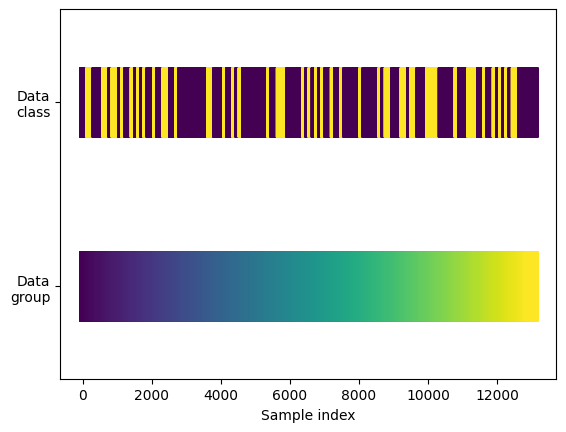

In [46]:
import matplotlib.pyplot as plt

def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(
        range(len(groups)),
        [0.5] * len(groups),
        c=groups.factorize()[0],  # Convert groups to numeric values for coloring
        marker="_",
        lw=50,
        cmap="viridis",
    )
    ax.scatter(
        range(len(groups)),
        [3.5] * len(groups),
        c=classes.factorize()[0],  # Convert classes to numeric values for coloring
        marker="_",
        lw=50,
        cmap="viridis",
    )
    ax.set(
        ylim=[-1, 5],
        yticks=[0.5, 3.5],
        yticklabels=["Data\ngroup", "Data\nclass"],
        xlabel="Sample index",
    )
    plt.show()

# Call the function
visualize_groups(Y, groups, "Grouped Cross-Validation Visualization")

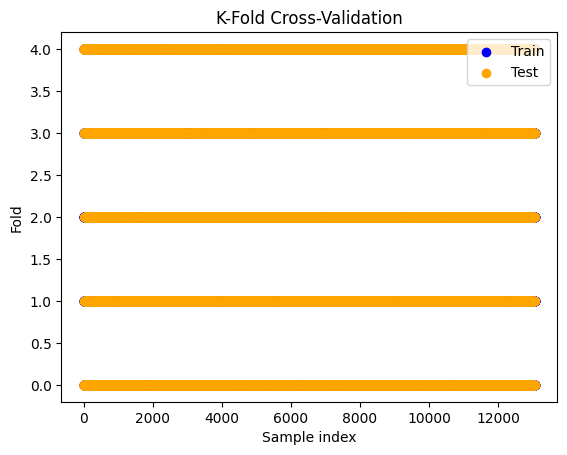

In [49]:
from sklearn.model_selection import KFold\

# Assuming `X` contains your features and `Y` contains your class labels
# Replace `X` and `Y` with the actual variables from your dataset

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Visualization function for K-Fold
def visualize_kfold_splits(cv, X, Y, name):
    fig, ax = plt.subplots()
    for fold, (train_index, test_index) in enumerate(cv.split(X, Y)):  # Pass both X and Y
        ax.scatter(train_index, [fold] * len(train_index), c="blue", label="Train" if fold == 0 else "")
        ax.scatter(test_index, [fold] * len(test_index), c="orange", label="Test" if fold == 0 else "")
    ax.set(
        xlabel="Sample index",
        ylabel="Fold",
        title=name,
    )
    ax.legend()
    plt.show()

# Visualize K-Fold splits
visualize_kfold_splits(kf, X, Y, "K-Fold Cross-Validation")

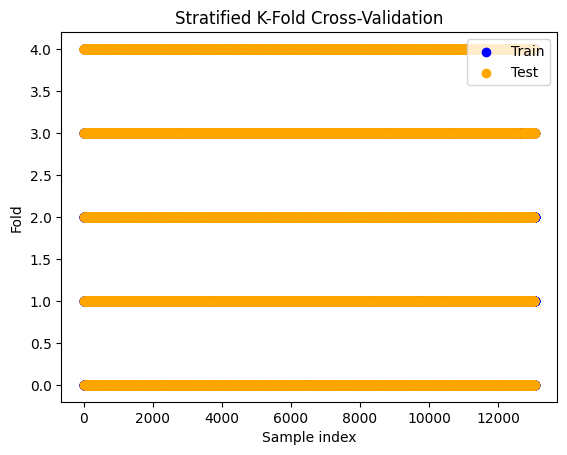

In [50]:
from sklearn.model_selection import StratifiedKFold

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Visualize Stratified K-Fold splits
visualize_kfold_splits(skf, X, Y, "Stratified K-Fold Cross-Validation")

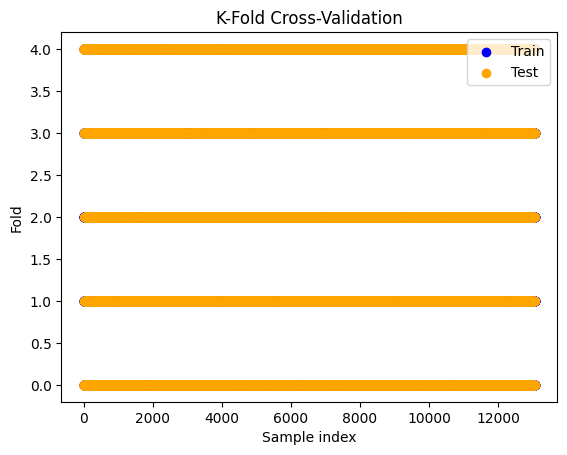

In [48]:
from sklearn.model_selection import KFold

# Assuming `X` contains your features and `y` contains your class labels
# Replace `X` and `y` with the actual variables from your dataset

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Visualization function for K-Fold
def visualize_kfold_splits(cv, X, Y, name):
    fig, ax = plt.subplots()
    for fold, (train_index, test_index) in enumerate(cv.split(X)):
        ax.scatter(train_index, [fold] * len(train_index), c="blue", label="Train" if fold == 0 else "")
        ax.scatter(test_index, [fold] * len(test_index), c="orange", label="Test" if fold == 0 else "")
    ax.set(
        xlabel="Sample index",
        ylabel="Fold",
        title=name,
    )
    ax.legend()
    plt.show()

# Visualize K-Fold splits
visualize_kfold_splits(kf, X, Y, "K-Fold Cross-Validation")